In [ ]:
pip install ultralytics

In [14]:
# وارد کردن کتابخانه‌های مورد نیاز
from ultralytics import YOLO  # کتابخانه Y亮的

import cv2  # کتابخانه OpenCV برای پردازش تصویر
import numpy as np  # کتابخانه NumPy برای کار با آرایه‌های تصویر
import matplotlib.pyplot as plt  # کتابخانه Matplotlib برای نمایش تصاویر در Google Colab
from google.colab import files  # ماژول Colab برای آپلود فایل‌های تصویر
from IPython.display import Image, display  # برای نمایش تصاویر ذخیره‌شده در Colab


In [15]:
# تابع برای نمایش تصویر با Matplotlib
# این تابع تصویر را از فرمت BGR (که OpenCV استفاده می‌کند) به RGB تبدیل کرده و نمایش می‌دهد
# مثال: اگر تصویری با کادر و متن داشته باشیم، این تابع آن را در Colab نشان می‌دهد
def show_image(image):
    plt.figure(figsize=(10, 6))  # تنظیم اندازه تصویر
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # تبدیل BGR به RGB برای نمایش صحیح رنگ‌ها
    plt.axis('off')  # مخفی کردن محورهای نمودار
    plt.show()


In [16]:
# آپلود تصویر توسط کاربر
# مثال: کاربر می‌تواند یک عکس حاوی اشیا (مثل "objects.jpg") را از سیستم خود آپلود کند
print("لطفاً یک تصویر حاوی اشیای مختلف آپلود کنید (فرمت‌های jpg یا png پشتیبانی می‌شوند):")
uploaded = files.upload()

# بررسی اینکه آیا تصویری آپلود شده است
if not uploaded:
    print("هیچ تصویری آپلود نشد! لطفاً یک تصویر انتخاب کنید.")
    exit()


لطفاً یک تصویر حاوی اشیای مختلف آپلود کنید (فرمت‌های jpg یا png پشتیبانی می‌شوند):


Saving object.jpg to object (1).jpg


In [18]:
# گرفتن اولین تصویر آپلود‌شده
image_path = list(uploaded.keys())[0]
print(f"تصویر آپلود‌شده: {image_path}")


تصویر آپلود‌شده: object (1).jpg


In [19]:
# خواندن تصویر با OpenCV
# مثال: تصویر "objects.jpg" به یک آرایه NumPy تبدیل می‌شود (ابعاد: ارتفاع، عرض، 3 برای RGB)
frame = cv2.imread(image_path)
if frame is None:
    print(f"نمی‌توان تصویر {image_path} را بارگذاری کرد!")
    print("لطفاً مطمئن شوید فایل تصویر معتبر است و فرمت آن (مثل jpg یا png) پشتیبانی می‌شود.")
    exit()


In [21]:
# بارگذاری مدل از پیش آموزش‌دیده YOLOv8
# yolov8n.pt یک مدل سبک و سریع است که می‌تواند اشیای مختلف را تشخیص دهد
# مثال: این مدل می‌تواند کتاب، لیوان، موبایل، یا حیوانات را شناسایی کند
try:
    model = YOLO('yolov8n.pt')  # فایل مدل باید از قبل دانلود شده باشد
except Exception as e:
    print(f"خطا در بارگذاری مدل YOLO: {e}")
    print("لطفاً مطمئن شوید کتابخانه ultralytics نصب شده است و فایل yolov8n.pt موجود است.")
    print("برای نصب ultralytics: !pip install ultralytics")
    exit()


In [23]:
# انجام تشخیص اشیا روی تصویر
# تابع model تصویر را پردازش می‌کند و لیستی از اشیای شناسایی‌شده را برمی‌گرداند
# مثال: اگر تصویر شامل یک کتاب و یک لیوان باشد، results شامل اطلاعات هر دو است
try:
    results = model(frame)
except Exception as e:
    print(f"خطا در تشخیص اشیا: {e}")
    print("ممکن است تصویر مشکل داشته باشد یا مدل YOLO به درستی کار نکند.")
    exit()



0: 448x640 1 chair, 2 couchs, 1 potted plant, 1 dining table, 1 book, 1 vase, 224.0ms
Speed: 5.8ms preprocess, 224.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


In [24]:
# پردازش نتایج تشخیص برای رسم کادر و برچسب‌ها
for result in results:
    # گرفتن اطلاعات کادرهای تشخیص (bounding boxes)
    boxes = result.boxes

    # پردازش هر کادر (هر شیء شناسایی‌شده)
    for box in boxes:
        # گرفتن مختصات کادر (x1, y1: گوشه بالا-چپ، x2, y2: گوشه پایین-راست)
        # مثال: اگر یک کتاب در مختصات (200, 300) با عرض 100 و ارتفاع 150 باشد
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # گرفتن احتمال اطمینان و کلاس شیء
        # مثال: اگر شیء یک کتاب باشد، confidence نشان می‌دهد مدل چقدر مطمئن است
        confidence = box.conf[0]
        class_id = int(box.cls[0])  # شناسه کلاس (مثلاً 73 برای "کتاب")
        label = model.names[class_id]  # نام شیء (مثلاً "book" یا "cup")

        # رسم کادر سبز دور شیء
        # (0, 255, 0) رنگ سبز است، 2 ضخامت خط کادر است
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # نمایش نام شیء و احتمال آن بالای کادر
        # مثال: متن "book: 0.92" در مختصات (x1, y1-10) نمایش داده می‌شود
        cv2.putText(frame, f"{label}: {confidence:.2f}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


In [25]:

# ذخیره تصویر پردازش‌شده
# مثال: تصویر با کادرها و متن‌ها به نام "output_yolo.jpg" ذخیره می‌شود
output_path = "output_yolo2.jpg"
cv2.imwrite(output_path, frame)
print(f"تصویر پردازش‌شده به نام {output_path} ذخیره شد.")


تصویر پردازش‌شده به نام output_yolo2.jpg ذخیره شد.


تصویر اصلی:


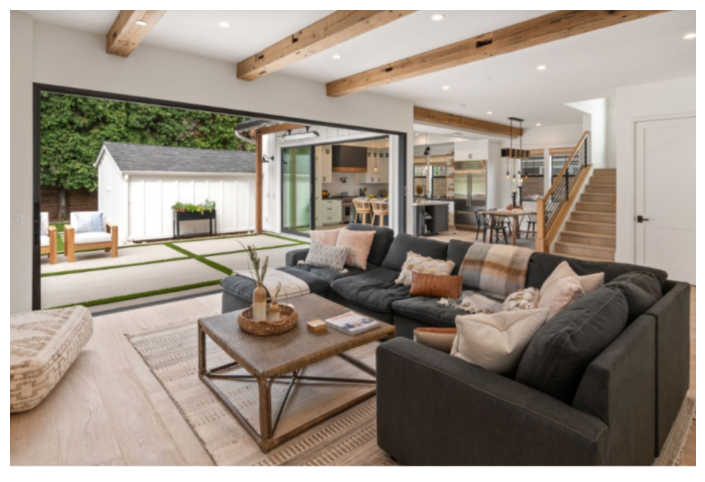

تصویر با تشخیص اشیا:


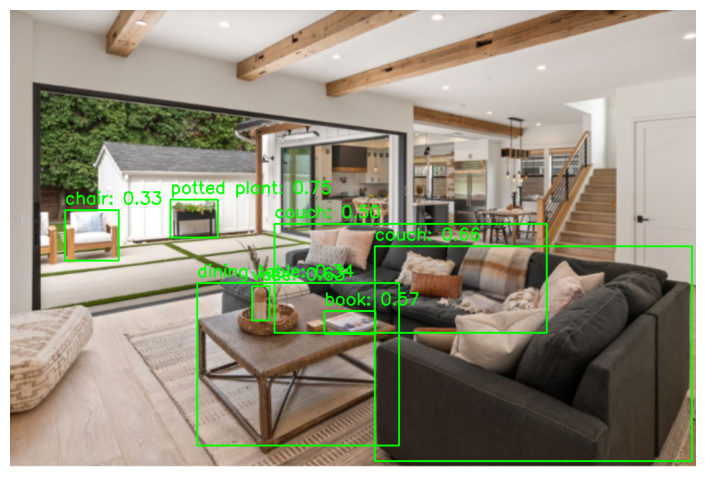

In [27]:
# نمایش تصویر اصلی و تصویر پردازش‌شده با Matplotlib
print("تصویر اصلی:")
show_image(cv2.imread(image_path))  # نمایش تصویر اصلی
print("تصویر با تشخیص اشیا:")
show_image(frame)  # نمایش تصویر پردازش‌شده


تصویر ذخیره‌شده:


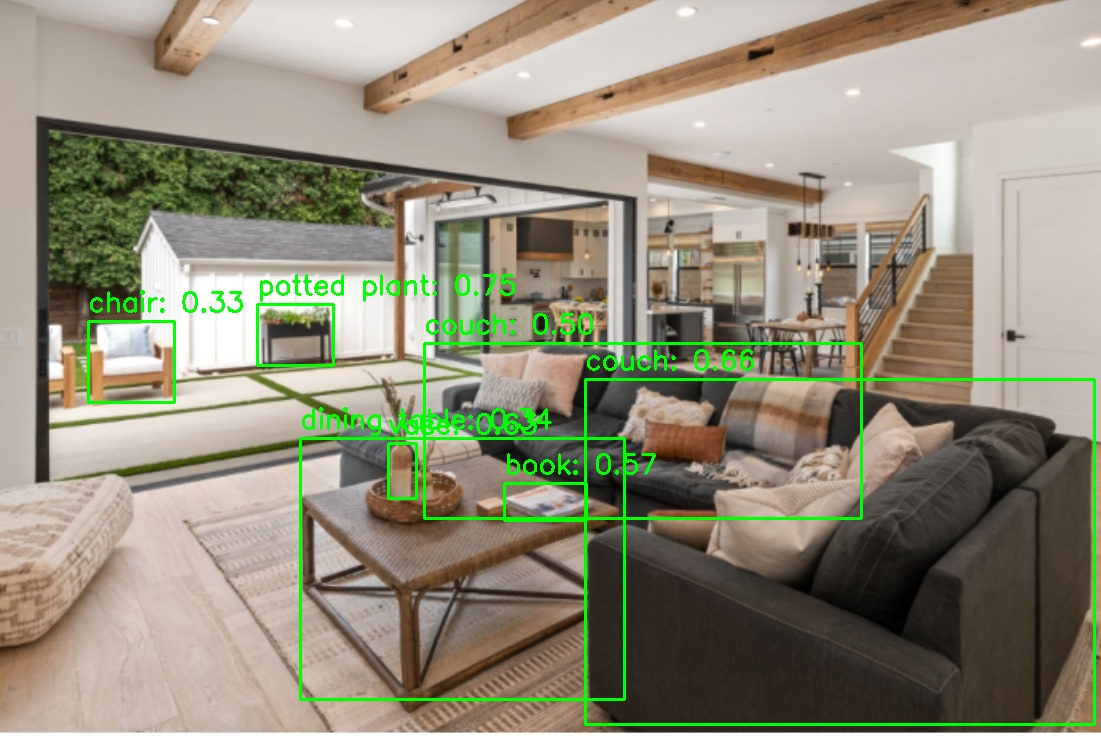

In [28]:

# نمایش تصویر ذخیره‌شده با IPython
print("تصویر ذخیره‌شده:")
display(Image(output_path))